# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp28 # use or create a database named demo
tweet_collection = db.lab9 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [10]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [11]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track) # ,locations = locations)   #Use either track or locations

1328072277976559618
1328072277972447232
1328072278974869505
1328072279692075010
1328072279650148353
1328072279671017473
1328072280174366720
1328072283123032064
1328072283471097856
1328072283668312067
1328072283655647233
1328072284565860353
1328072284515524608
1328072285488640003
1328072285534621697
1328072285954125825
1328072286470098947
1328072287321550857
1328072288185573376
1328072288395202560
1328072288642732038
1328072289762615298
1328072290085576704
1328072289846521859
1328072290521784321
1328072290467102720
1328072290534379521
1328072292862205952
1328072293365518338
1328072293852045312
1328072294653112321
1328072294783193088
1328072296498663427
1328072298008612864
1328072297769480197
1328072298604138502
1328072298545418240
1328072300080590848
1328072300265164800
1328072300621688840
1328072301137555457
1328072300730658821
1328072301351477250
1328072302588796931
1328072302706167812
1328072303826010113
1328072304509808643
1328072304933343232
1328072305642188806
1328072306313322497


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
# geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Nov 15 20:28:35 +0000 2020'
'Sun Nov 15 20:28:35 +0000 2020'
'Sun Nov 15 20:28:35 +0000 2020'
'Sun Nov 15 20:28:34 +0000 2020'
'Sun Nov 15 20:28:34 +0000 2020'
'Sun Nov 15 20:28:34 +0000 2020'
'Sun Nov 15 20:28:34 +0000 2020'
'Sun Nov 15 20:28:33 +0000 2020'
'Sun Nov 15 20:28:33 +0000 2020'
'Sun Nov 15 20:28:33 +0000 2020'
'Sun Nov 15 20:28:32 +0000 2020'
'Sun Nov 15 20:28:32 +0000 2020'
'Sun Nov 15 20:28:32 +0000 2020'
'Sun Nov 15 20:28:32 +0000 2020'
'Sun Nov 15 20:28:31 +0000 2020'
'Sun Nov 15 20:28:31 +0000 2020'
'Sun Nov 15 20:28:31 +0000 2020'
'Sun Nov 15 20:28:31 +0000 2020'
'Sun Nov 15 20:28:31 +0000 2020'
'Sun Nov 15 20:28:31 +0000 2020'
'Sun Nov 15 20:28:31 +0000 2020'
'Sun Nov 15 20:28:30 +0000 2020'
'Sun Nov 15 20:28:30 +0000 2020'
'Sun Nov 15 20:28:30 +0000 2020'
'Sun Nov 15 20:28:30 +0000 2020'
'Sun Nov 15 20:28:29 +0000 2020'
'Sun Nov 15 20:28:29 +0000 2020'
'Sun Nov 15 20:28:28 +0000 2020'
'Sun Nov 15 20:28:27 +0000 2020'
'Sun Nov 15 20:28:27 +0000 2020'
'Sun Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [15]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 15 20:27:59 +0000 2020'
'Sun Nov 15 20:27:59 +0000 2020'
'Sun Nov 15 20:27:59 +0000 2020'
'Sun Nov 15 20:27:58 +0000 2020'
'Sun Nov 15 20:27:58 +0000 2020'
'Sun Nov 15 20:27:58 +0000 2020'
'Sun Nov 15 20:27:58 +0000 2020'
'Sun Nov 15 20:27:57 +0000 2020'
'Sun Nov 15 20:27:57 +0000 2020'
'Sun Nov 15 20:27:57 +0000 2020'
'Sun Nov 15 20:27:57 +0000 2020'
'Sun Nov 15 20:27:57 +0000 2020'
'Sun Nov 15 20:27:56 +0000 2020'
'Sun Nov 15 20:27:56 +0000 2020'
'Sun Nov 15 20:27:56 +0000 2020'
'Sun Nov 15 20:27:55 +0000 2020'
'Sun Nov 15 20:27:54 +0000 2020'
'Sun Nov 15 20:27:54 +0000 2020'
'Sun Nov 15 20:27:53 +0000 2020'
'Sun Nov 15 20:27:53 +0000 2020'
'Sun Nov 15 20:27:53 +0000 2020'
'Sun Nov 15 20:27:53 +0000 2020'
'Sun Nov 15 20:27:53 +0000 2020'
'Sun Nov 15 20:27:53 +0000 2020'
'Sun Nov 15 20:27:52 +0000 2020'
'Sun Nov 15 20:27:52 +0000 2020'
'Sun Nov 15 20:27:52 +0000 2020'
'Sun Nov 15 20:27:52 +0000 2020'
'Sun Nov 15 20:27:52 +0000 2020'
'Sun Nov 15 20:27:52 +0000 2020'
'Sun Nov 1

'Sun Nov 15 20:27:08 +0000 2020'
'Sun Nov 15 20:27:08 +0000 2020'
'Sun Nov 15 20:27:08 +0000 2020'
'Sun Nov 15 20:27:08 +0000 2020'
'Sun Nov 15 20:27:08 +0000 2020'
'Sun Nov 15 20:27:08 +0000 2020'
'Sun Nov 15 20:27:08 +0000 2020'
'Sun Nov 15 20:27:07 +0000 2020'
'Sun Nov 15 20:27:07 +0000 2020'
'Sun Nov 15 20:27:07 +0000 2020'
'Sun Nov 15 20:27:07 +0000 2020'
'Sun Nov 15 20:27:07 +0000 2020'
'Sun Nov 15 20:27:06 +0000 2020'
'Sun Nov 15 20:27:06 +0000 2020'
'Sun Nov 15 20:27:06 +0000 2020'
'Sun Nov 15 20:27:06 +0000 2020'
'Sun Nov 15 20:27:05 +0000 2020'
'Sun Nov 15 20:27:05 +0000 2020'
'Sun Nov 15 20:27:05 +0000 2020'
'Sun Nov 15 20:27:05 +0000 2020'
'Sun Nov 15 20:27:05 +0000 2020'
'Sun Nov 15 20:27:05 +0000 2020'
'Sun Nov 15 20:27:04 +0000 2020'
'Sun Nov 15 20:27:04 +0000 2020'
'Sun Nov 15 20:27:04 +0000 2020'
'Sun Nov 15 20:27:04 +0000 2020'
'Sun Nov 15 20:27:03 +0000 2020'
'Sun Nov 15 20:27:03 +0000 2020'
'Sun Nov 15 20:27:03 +0000 2020'
'Sun Nov 15 20:27:03 +0000 2020'
'Sun Nov 1

'Sun Nov 15 20:26:02 +0000 2020'
'Sun Nov 15 20:26:00 +0000 2020'
'Sun Nov 15 20:26:00 +0000 2020'
'Sun Nov 15 20:26:00 +0000 2020'
'Sun Nov 15 20:26:00 +0000 2020'
'Sun Nov 15 20:25:59 +0000 2020'
'Sun Nov 15 20:25:59 +0000 2020'
'Sun Nov 15 20:25:59 +0000 2020'
'Sun Nov 15 20:25:59 +0000 2020'
'Sun Nov 15 20:25:58 +0000 2020'
'Sun Nov 15 20:25:58 +0000 2020'
'Sun Nov 15 20:25:58 +0000 2020'
'Sun Nov 15 20:25:58 +0000 2020'
'Sun Nov 15 20:25:58 +0000 2020'
'Sun Nov 15 20:25:58 +0000 2020'
'Sun Nov 15 20:25:58 +0000 2020'
'Sun Nov 15 20:25:58 +0000 2020'
'Sun Nov 15 20:25:57 +0000 2020'
'Sun Nov 15 20:25:57 +0000 2020'
'Sun Nov 15 20:25:57 +0000 2020'
'Sun Nov 15 20:25:57 +0000 2020'
'Sun Nov 15 20:25:57 +0000 2020'
'Sun Nov 15 20:25:57 +0000 2020'
'Sun Nov 15 20:25:56 +0000 2020'
'Sun Nov 15 20:25:56 +0000 2020'
'Sun Nov 15 20:25:56 +0000 2020'
'Sun Nov 15 20:25:56 +0000 2020'
'Sun Nov 15 20:25:55 +0000 2020'
'Sun Nov 15 20:25:55 +0000 2020'
'Sun Nov 15 20:25:55 +0000 2020'
'Sun Nov 1

'Sun Nov 15 20:25:12 +0000 2020'
'Sun Nov 15 20:25:12 +0000 2020'
'Sun Nov 15 20:25:12 +0000 2020'
'Sun Nov 15 20:25:11 +0000 2020'
'Sun Nov 15 20:25:11 +0000 2020'
'Sun Nov 15 20:25:11 +0000 2020'
'Sun Nov 15 20:25:11 +0000 2020'
'Sun Nov 15 20:25:11 +0000 2020'
'Sun Nov 15 20:25:11 +0000 2020'
'Sun Nov 15 20:25:11 +0000 2020'
'Sun Nov 15 20:25:11 +0000 2020'
'Sun Nov 15 20:25:11 +0000 2020'
'Sun Nov 15 20:25:10 +0000 2020'
'Sun Nov 15 20:25:10 +0000 2020'
'Sun Nov 15 20:25:09 +0000 2020'
'Sun Nov 15 20:25:09 +0000 2020'
'Sun Nov 15 20:25:09 +0000 2020'
'Sun Nov 15 20:25:08 +0000 2020'
'Sun Nov 15 20:25:08 +0000 2020'
'Sun Nov 15 20:25:08 +0000 2020'
'Sun Nov 15 20:25:08 +0000 2020'
'Sun Nov 15 20:25:08 +0000 2020'
'Sun Nov 15 20:25:08 +0000 2020'
'Sun Nov 15 20:25:07 +0000 2020'
'Sun Nov 15 20:25:07 +0000 2020'
'Sun Nov 15 20:25:06 +0000 2020'
'Sun Nov 15 20:25:06 +0000 2020'
'Sun Nov 15 20:25:06 +0000 2020'
'Sun Nov 15 20:25:05 +0000 2020'
'Sun Nov 15 20:25:05 +0000 2020'
'Sun Nov 1

'Sun Nov 15 20:24:12 +0000 2020'
'Sun Nov 15 20:24:12 +0000 2020'
'Sun Nov 15 20:24:12 +0000 2020'
'Sun Nov 15 20:24:12 +0000 2020'
'Sun Nov 15 20:24:12 +0000 2020'
'Sun Nov 15 20:24:12 +0000 2020'
'Sun Nov 15 20:24:12 +0000 2020'
'Sun Nov 15 20:24:12 +0000 2020'
'Sun Nov 15 20:24:11 +0000 2020'
'Sun Nov 15 20:24:11 +0000 2020'
'Sun Nov 15 20:24:11 +0000 2020'
'Sun Nov 15 20:24:11 +0000 2020'
'Sun Nov 15 20:24:10 +0000 2020'
'Sun Nov 15 20:24:10 +0000 2020'
'Sun Nov 15 20:24:10 +0000 2020'
'Sun Nov 15 20:24:10 +0000 2020'
'Sun Nov 15 20:24:09 +0000 2020'
'Sun Nov 15 20:24:09 +0000 2020'
'Sun Nov 15 20:24:09 +0000 2020'
'Sun Nov 15 20:24:09 +0000 2020'
'Sun Nov 15 20:24:08 +0000 2020'
'Sun Nov 15 20:24:08 +0000 2020'
'Sun Nov 15 20:24:08 +0000 2020'
'Sun Nov 15 20:24:08 +0000 2020'
'Sun Nov 15 20:24:08 +0000 2020'
'Sun Nov 15 20:24:07 +0000 2020'
'Sun Nov 15 20:24:07 +0000 2020'
'Sun Nov 15 20:24:07 +0000 2020'
'Sun Nov 15 20:24:06 +0000 2020'
'Sun Nov 15 20:24:06 +0000 2020'
'Sun Nov 1

'Sun Nov 15 20:23:08 +0000 2020'
'Sun Nov 15 20:23:08 +0000 2020'
'Sun Nov 15 20:23:08 +0000 2020'
'Sun Nov 15 20:23:08 +0000 2020'
'Sun Nov 15 20:23:08 +0000 2020'
'Sun Nov 15 20:23:08 +0000 2020'
'Sun Nov 15 20:23:07 +0000 2020'
'Sun Nov 15 20:23:07 +0000 2020'
'Sun Nov 15 20:23:07 +0000 2020'
'Sun Nov 15 20:23:07 +0000 2020'
'Sun Nov 15 20:23:07 +0000 2020'
'Sun Nov 15 20:23:07 +0000 2020'
'Sun Nov 15 20:23:06 +0000 2020'
'Sun Nov 15 20:23:06 +0000 2020'
'Sun Nov 15 20:23:06 +0000 2020'
'Sun Nov 15 20:23:06 +0000 2020'
'Sun Nov 15 20:23:06 +0000 2020'
'Sun Nov 15 20:23:06 +0000 2020'
'Sun Nov 15 20:23:06 +0000 2020'
'Sun Nov 15 20:23:06 +0000 2020'
'Sun Nov 15 20:23:06 +0000 2020'
'Sun Nov 15 20:23:06 +0000 2020'
'Sun Nov 15 20:23:06 +0000 2020'
'Sun Nov 15 20:23:06 +0000 2020'
'Sun Nov 15 20:23:06 +0000 2020'
'Sun Nov 15 20:23:05 +0000 2020'
'Sun Nov 15 20:23:05 +0000 2020'
'Sun Nov 15 20:23:05 +0000 2020'
'Sun Nov 15 20:23:04 +0000 2020'
'Sun Nov 15 20:23:04 +0000 2020'
'Sun Nov 1

'Sun Nov 15 20:22:09 +0000 2020'
'Sun Nov 15 20:22:09 +0000 2020'
'Sun Nov 15 20:22:09 +0000 2020'
'Sun Nov 15 20:22:09 +0000 2020'
'Sun Nov 15 20:22:09 +0000 2020'
'Sun Nov 15 20:22:08 +0000 2020'
'Sun Nov 15 20:22:07 +0000 2020'
'Sun Nov 15 20:22:07 +0000 2020'
'Sun Nov 15 20:22:07 +0000 2020'
'Sun Nov 15 20:22:07 +0000 2020'
'Sun Nov 15 20:22:07 +0000 2020'
'Sun Nov 15 20:22:06 +0000 2020'
'Sun Nov 15 20:22:06 +0000 2020'
'Sun Nov 15 20:22:06 +0000 2020'
'Sun Nov 15 20:22:06 +0000 2020'
'Sun Nov 15 20:22:05 +0000 2020'
'Sun Nov 15 20:22:05 +0000 2020'
'Sun Nov 15 20:22:04 +0000 2020'
'Sun Nov 15 20:22:04 +0000 2020'
'Sun Nov 15 20:22:04 +0000 2020'
'Sun Nov 15 20:22:04 +0000 2020'
'Sun Nov 15 20:22:03 +0000 2020'
'Sun Nov 15 20:22:03 +0000 2020'
'Sun Nov 15 20:22:03 +0000 2020'
'Sun Nov 15 20:22:03 +0000 2020'
'Sun Nov 15 20:22:02 +0000 2020'
'Sun Nov 15 20:22:02 +0000 2020'
'Sun Nov 15 20:22:02 +0000 2020'
'Sun Nov 15 20:22:02 +0000 2020'
'Sun Nov 15 20:22:02 +0000 2020'
'Sun Nov 1

'Sun Nov 15 20:21:14 +0000 2020'
'Sun Nov 15 20:21:13 +0000 2020'
'Sun Nov 15 20:21:13 +0000 2020'
'Sun Nov 15 20:21:13 +0000 2020'
'Sun Nov 15 20:21:13 +0000 2020'
'Sun Nov 15 20:21:13 +0000 2020'
'Sun Nov 15 20:21:13 +0000 2020'
'Sun Nov 15 20:21:12 +0000 2020'
'Sun Nov 15 20:21:12 +0000 2020'
'Sun Nov 15 20:21:12 +0000 2020'
'Sun Nov 15 20:21:12 +0000 2020'
'Sun Nov 15 20:21:12 +0000 2020'
'Sun Nov 15 20:21:11 +0000 2020'
'Sun Nov 15 20:21:11 +0000 2020'
'Sun Nov 15 20:21:10 +0000 2020'
'Sun Nov 15 20:21:10 +0000 2020'
'Sun Nov 15 20:21:09 +0000 2020'
'Sun Nov 15 20:21:09 +0000 2020'
'Sun Nov 15 20:21:09 +0000 2020'
'Sun Nov 15 20:21:09 +0000 2020'
'Sun Nov 15 20:21:08 +0000 2020'
'Sun Nov 15 20:21:08 +0000 2020'
'Sun Nov 15 20:21:08 +0000 2020'
'Sun Nov 15 20:21:08 +0000 2020'
'Sun Nov 15 20:21:07 +0000 2020'
'Sun Nov 15 20:21:07 +0000 2020'
'Sun Nov 15 20:21:07 +0000 2020'
'Sun Nov 15 20:21:06 +0000 2020'
'Sun Nov 15 20:21:05 +0000 2020'
'Sun Nov 15 20:21:05 +0000 2020'
'Sun Nov 1

'Sun Nov 15 20:20:08 +0000 2020'
'Sun Nov 15 20:20:08 +0000 2020'
'Sun Nov 15 20:20:08 +0000 2020'
'Sun Nov 15 20:20:08 +0000 2020'
'Sun Nov 15 20:20:08 +0000 2020'
'Sun Nov 15 20:20:07 +0000 2020'
'Sun Nov 15 20:20:07 +0000 2020'
'Sun Nov 15 20:20:07 +0000 2020'
'Sun Nov 15 20:20:07 +0000 2020'
'Sun Nov 15 20:20:07 +0000 2020'
'Sun Nov 15 20:20:07 +0000 2020'
'Sun Nov 15 20:20:07 +0000 2020'
'Sun Nov 15 20:20:06 +0000 2020'
'Sun Nov 15 20:20:06 +0000 2020'
'Sun Nov 15 20:20:06 +0000 2020'
'Sun Nov 15 20:20:05 +0000 2020'
'Sun Nov 15 20:20:05 +0000 2020'
'Sun Nov 15 20:20:05 +0000 2020'
'Sun Nov 15 20:20:05 +0000 2020'
'Sun Nov 15 20:20:05 +0000 2020'
'Sun Nov 15 20:20:05 +0000 2020'
'Sun Nov 15 20:20:05 +0000 2020'
'Sun Nov 15 20:20:05 +0000 2020'
'Sun Nov 15 20:20:04 +0000 2020'
'Sun Nov 15 20:20:04 +0000 2020'
'Sun Nov 15 20:20:04 +0000 2020'
'Sun Nov 15 20:20:03 +0000 2020'
'Sun Nov 15 20:20:03 +0000 2020'
'Sun Nov 15 20:20:03 +0000 2020'
'Sun Nov 15 20:20:02 +0000 2020'
'Sun Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [16]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

6374
5612


Create a text index and print the Tweets containing specific keywords. 

In [17]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [19]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document   
        
         
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Andrea L Gross
text: RT @DickMorrisTweet: Did Former Biden Staffer Delay Pfizer Vaccine Announcement Until AFTER The Election - Special Election Alert! https://…
----
name: Bronwyn Harkin
text: RT @DickMorrisTweet: Did Former Biden Staffer Delay Pfizer Vaccine Announcement Until AFTER The Election - Special Election Alert! https://…
----
name: President-Elect Bianca
text: RT @DickMorrisTweet: Did Former Biden Staffer Delay Pfizer Vaccine Announcement Until AFTER The Election - Special Election Alert! https://…
----
name: Wayne Babin
text: RT @DickMorrisTweet: Did Former Biden Staffer Delay Pfizer Vaccine Announcement Until AFTER The Election - Special Election Alert! https://…
----
name: Roy Jordan
text: RT @AOECOIN: The #American elections caught "a case" of "#Covid19" &amp; are just as valid for determining actual result of elections as the PC…
----
name: Thoughts
text: The massive surge in Covid19 cases shows how poorly the in-person voting would have been handled on Elec

In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [21]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,lang,quote_count,reply_count,filter_level,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,possibly_sensitive
0,5fb18dbfe78bd74889e2382a,Sun Nov 15 20:06:51 +0000 2020,1328066955555778569,1328066955555778569,RT @DickMorrisTweet: Did Former Biden Staffer ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fb18db4e78bd74889e23452,Sun Nov 15 20:10:26 +0000 2020,1328067858224480256,1328067858224480256,RT @DickMorrisTweet: Did Former Biden Staffer ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fb18da4e78bd74889e22e9f,Sun Nov 15 20:15:59 +0000 2020,1328069255435149313,1328069255435149313,RT @DickMorrisTweet: Did Former Biden Staffer ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fb18cdae78bd74889e22a9c,Sun Nov 15 20:17:25 +0000 2020,1328069617613475841,1328069617613475841,RT @DickMorrisTweet: Did Former Biden Staffer ...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,en,0.0,0.0,low,1605471445836,NaN,NaN,NaN,NaN,NaN
4,5fb18f58adb53eaa4c37b330,Sun Nov 15 20:28:03 +0000 2020,1328072290534379521,1328072290534379521,"RT @AOECOIN: The #American elections caught ""a...",False,"{'hashtags': [{'text': 'American', 'indices': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,0.0,0.0,low,1605472083110,1.328071e+18,1328070774121320448,{'created_at': 'Sun Nov 15 20:22:01 +0000 2020...,"{'url': 'https://t.co/Oeo7Y35ge0', 'expanded':...",NaN
5,5fb18f94adb53eaa4c37ba64,Sun Nov 15 20:22:12 +0000 2020,1328070819948359681,1328070819948359681,The massive surge in Covid19 cases shows how p...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fb18f8fadb53eaa4c37b89f,Sun Nov 15 20:23:57 +0000 2020,1328071261524688896,1328071261524688896,@JuddApatow The massive surge in Covid19 cases...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.328028e+18,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fb18f8fadb53eaa4c37b87a,Sun Nov 15 20:24:06 +0000 2020,1328071296345731072,1328071296345731072,@ConanOBrien The massive surge in Covid19 case...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.328024e+18,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fb18f8eadb53eaa4c37b809,Sun Nov 15 20:24:31 +0000 2020,1328071403539611648,1328071403539611648,@KimKardashian The massive surge in Covid19 ca...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.328071e+18,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fb18f75adb53eaa4c37b3b0,Sun Nov 15 20:28:33 +0000 2020,1328072416023625728,1328072416023625728,@TheDailyShow The massive surge in Covid19 cas...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.328036e+18,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


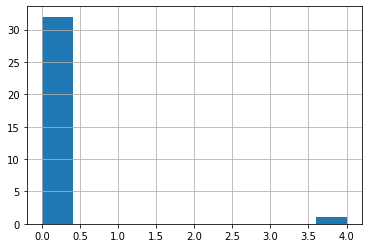

In [22]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count